## 目录
简介  
数据整理  
探索性数据分析  
结论

## 简介
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database）。数据集中包含来自1970-2016年上映的近11,000部电影的基本信息，主要包括了电影类型、预算、票房、演职人员、时长、评分等信息。

分析步骤分为以下几步：  
1.提出问题  
2.导入数据  
3.数据清洗  
4.数据分析及可视化  
5.形成数据分析报告

数据来源：[TMDb电影数据](https://github.com/SarahHe3/new-dand-basic-china/blob/master/%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%85%A5%E9%97%A8/%E9%A1%B9%E7%9B%AE-%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86/%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86%20-%20%E5%A4%87%E9%80%89%E6%95%B0%E6%8D%AE%E9%9B%86.md)

### 1.提出问题  
1. 各类型的电影数量随时间的变化  
2. 各类型的电影的获利情况
3. 哪些因素会影响票房 


### 2.导入数据

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import json

UsageError: Line magic function `%` not found.


### 3. 数据整理

In [344]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [346]:
#去除不会用到的因素
df.drop(['imdb_id', 'original_title', 'homepage', 'overview', 'tagline'], axis = 1, inplace = True)

In [347]:
#查重
df.duplicated().sum()

1

In [348]:
#去除一条重复数据并再次查重
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [349]:
# 查空值
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [350]:
#看数据的大概情况
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [365]:
#去除不合理的数据
df = df[df['popularity']>0]
df = df[df['budget']>0]
df = df[df['release_year'] < 2020]

In [366]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1974, 1975, 1971, 1990, 1976, 1993, 1986, 1973,
       1970, 1978])

In [367]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.to_datetime(df.release_date, format = '%Y-%m-%d').dt.year

In [368]:
#去除数据后的数据情况
df['genres'] = df['genres'].fillna('NaN')
df_index = df[df['genres'] == 'NaN'].index.tolist()
df = df.drop(df_index)
df.shape

(5044, 36)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 10815
Data columns (total 36 columns):
id                      5044 non-null int64
popularity              5044 non-null float64
budget                  5044 non-null int64
revenue                 5044 non-null int64
cast                    5034 non-null object
director                5040 non-null object
keywords                4716 non-null object
runtime                 5044 non-null int64
genres                  5044 non-null object
production_companies    4908 non-null object
release_date            5044 non-null datetime64[ns]
vote_count              5044 non-null int64
vote_average            5044 non-null float64
release_year            5044 non-null int64
budget_adj              5044 non-null float64
revenue_adj             5044 non-null float64
Comedy                  5044 non-null int64
Drama                   5044 non-null int64
Documentary             5044 non-null int64
Western                 5044 non-n

### 4.数据分析及可视化  
#### 4.1 各类型的电影数量随时间的变化

In [370]:
#提取电影的类型
genre = set()
for i in df['genres'].str.split('|'):
    genre = set().union(i, genre)
genre = list(genre)
genre

['Drama',
 'Comedy',
 'Documentary',
 'Western',
 'TV Movie',
 'Romance',
 'Animation',
 'Foreign',
 'Action',
 'Mystery',
 'Thriller',
 'Family',
 'Music',
 'History',
 'Horror',
 'Fantasy',
 'Crime',
 'Science Fiction',
 'Adventure',
 'War']

In [371]:
for genr in genre:
    df[genr] = df['genres'].str.contains(genr).apply(lambda x: 1 if x else 0)
df_gy = df.loc[:, genre]
df_gy

,Drama,Comedy,Documentary,Western,TV Movie,Romance,Animation,Foreign,Action,Mystery,Thriller,Family,Music,History,Horror,Fantasy,Crime,Science Fiction,Adventure,War
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
10800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10802,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10810,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [372]:
#加上年份
df_gy.index = df['release_year']
df_gy.index.unique()

Int64Index([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
            2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
            1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
            1991, 1988, 1987, 1974, 1975, 1971, 1990, 1976, 1993, 1986, 1973,
            1970, 1978],
           dtype='int64', name='release_year')

Text(0, 0.5, 'Number')

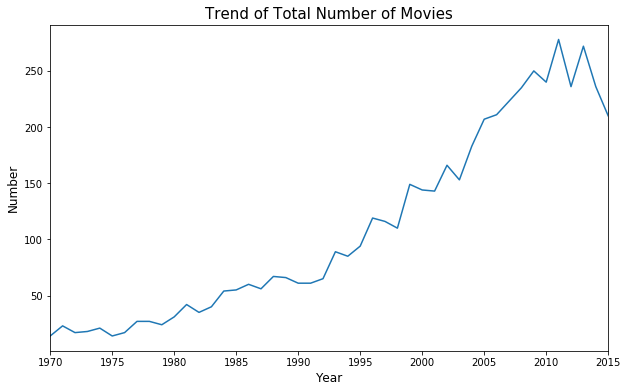

In [373]:
#制图--电影总数随时间的增长变化
df_gy.groupby('release_year').Crime.count().plot(figsize = (10,6))
plt.xticks(range(1970,2020,5))
plt.title('Trend of Total Number of Movies', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number', fontsize = 12)

从这张图可以看出电影的总数量随时间递增。尤其是从1992年后进入快速递增时期。  
接下来，我们分析各个类型的电影的增长变化情况。

In [374]:
# 电影类型的统计
df_gysum = df_gy.sum().sort_values()
df_gysum

TV Movie              9
Foreign              34
Documentary          64
Western              64
War                 141
Music               160
History             170
Animation           256
Mystery             428
Fantasy             502
Family              510
Science Fiction     690
Horror              749
Crime               806
Romance             835
Adventure           873
Action             1398
Thriller           1615
Comedy             1710
Drama              2254
dtype: int64

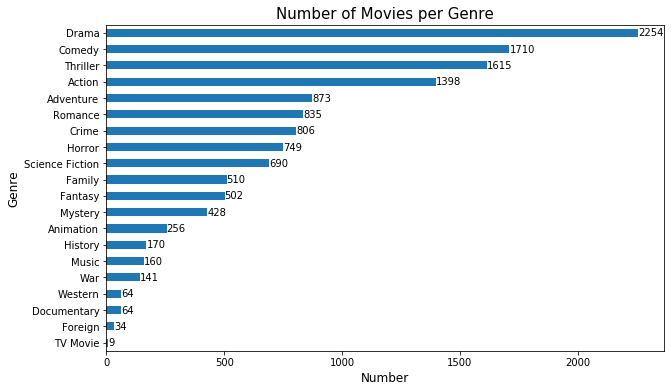

In [375]:
#制作电影类型的数量图
ax = df_gysum.plot(kind = 'barh', figsize = (10,6))
plt.title('Number of Movies per Genre', fontsize = 15)
plt.xlabel('Number', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)

rects = ax.patches
labels = ["%d" % i for i in list(df_gysum)]
for rect, label in zip(rects, labels):
    w = rect.get_width()
    ax.text(w, rect.get_y() + rect.get_height() / 2, label,ha='left', va='center')

Text(0, 0.5, '')

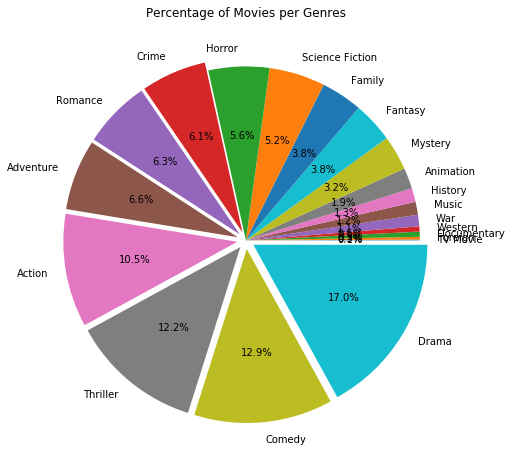

In [376]:
perc = df_gysum/df_gysum.sum()
labels = df_gysum.index
explode = (perc > 0.06)/20
df_gysum.plot(kind = 'pie',labels=labels ,autopct='%1.1f%%', explode = explode, figsize = (8,8))
plt.title('Percentage of Movies per Genres')
plt.ylabel('')

从条形图和饼图可以看出，Drama, Comedy, Thriller, Action这几类电影占比较多，分别为17%，12.9%，12.2%和10.5%。接下去，我们选取top10的电影类型，观察电影类型随时间的增长变化情况。

In [377]:
df_gysum.dtype

dtype('int64')

In [378]:
#选出最热门的10个电影类型，按照时间制图。看各个类型的电影随时间的变化情况
df_gy1 = df[df_gy.sum().sort_values(ascending = False).head(10).index]
df_gy1.index = df['release_year']
df_gys = df_gy1.groupby('release_year').sum()

Text(0, 0.5, 'Number')

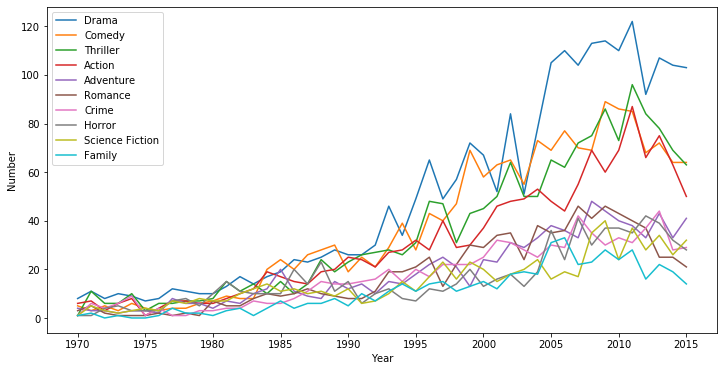

In [379]:
plt.figure(figsize = (12, 6))
plt.plot(df_gys, label = df_gys.columns)
plt.legend(df_gys)
plt.xticks(range(1970, 2020, 5))
plt.xlabel('Year')
plt.ylabel('Number')

#### 结论4.1
从1970到2015年以来，各个类型的电影数量不断增长，从1992年后进入快速增长时期。而Drama, Comedy, Thriller, Action这四类电影，在数量上远超过其他类型的电影。

#### 4.2 各类型的电影的获利情况

In [394]:
#增加收益列
df['profit'] = df['revenue'] - df['budget']
df.head(2)

,level_0,id,popularity,budget,revenue,cast,director,keywords,runtime,genres,...,Family,Music,History,Horror,Crime,Fantasy,Science Fiction,Adventure,War,profit
0,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,...,0,0,0,0,0,0,1,1,0,1363528810
1,1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,...,0,0,0,0,0,0,1,1,0,228436354


In [410]:
df_profit = pd.DataFrame()
df_profit = pd.concat([df_gy.iloc[:,1:], df['profit']], axis = 1)
df_profit

,release_year,Drama,Comedy,Documentary,Western,TV Movie,Romance,Animation,Foreign,Action,...,Family,Music,History,Horror,Fantasy,Crime,Science Fiction,Adventure,War,profit
0,2015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1363528810
1,2015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,228436354
2,2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,185238201
3,2015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,1868178225
4,2015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,1978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,-3000000
5040,1978,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-11000000
5041,1978,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-6727000
5042,1978,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,-90000


In [615]:
#创建一个Series：profit_by_genre， index为genre，计算各个genre的平均收益
profit_by_genre = pd.Series(index = genre)
for genr in genre:
    profit_by_genre.loc[genr] = df_profit.loc[:,[genr, 'profit']].groupby(genr).mean().loc[1,'profit']
profit_by_genre

Drama              3.232156e+07
Comedy             4.749490e+07
Documentary        7.628694e+06
Western            2.000881e+07
TV Movie          -3.000000e+05
Romance            4.211953e+07
Animation          1.370286e+08
Foreign           -3.775359e+06
Action             7.370512e+07
Mystery            4.233156e+07
Thriller           4.148198e+07
Family             1.115284e+08
Music              4.378805e+07
History            2.404170e+07
Horror             2.171088e+07
Fantasy            1.124942e+08
Crime              3.796785e+07
Science Fiction    7.871770e+07
Adventure          1.226263e+08
War                4.807592e+07
dtype: float64

In [616]:
#创建一个Series：budget_by_genre， index为genre，计算各个genre的平均预算
df_budget = pd.concat([df_gy.iloc[:,1:], df['budget']], axis = 1)
budget_by_genre = pd.Series(index = genre)
for genr in genre:
    budget_by_genre.loc[genr] = df_budget.loc[:, [genr, 'budget']].groupby(genr).mean().loc[1,'budget']
budget_by_genre                                                    

Drama              2.493167e+07
Comedy             2.943296e+07
Documentary        4.689337e+06
Western            4.815556e+07
TV Movie           4.966667e+06
Romance            2.553110e+07
Animation          6.320458e+07
Foreign            8.025578e+06
Action             4.712726e+07
Mystery            3.041467e+07
Thriller           3.092063e+07
Family             5.621912e+07
Music              2.361725e+07
History            3.568311e+07
Horror             1.359680e+07
Fantasy            5.943701e+07
Crime              2.960468e+07
Science Fiction    4.443935e+07
Adventure          6.300051e+07
War                3.912588e+07
dtype: float64

In [617]:
#合并数据
profit_rate = pd.concat([budget_by_genre , profit_by_genre], axis = 1)
profit_rate.columns = ['budget','profit']
profit_rate

,budget,profit
Drama,2.493167e+07,3.232156e+07
Comedy,2.943296e+07,4.749490e+07
Documentary,4.689337e+06,7.628694e+06
Western,4.815556e+07,2.000881e+07
TV Movie,4.966667e+06,-3.000000e+05
Romance,2.553110e+07,4.211953e+07
Animation,6.320458e+07,1.370286e+08
Foreign,8.025578e+06,-3.775359e+06
Action,4.712726e+07,7.370512e+07
Mystery,3.041467e+07,4.233156e+07


In [618]:
#增加profit_rate一列，并按profit, profit_rate排序
profit_rate['profit_rate'] = (profit_rate.profit/profit_rate.budget)*100

profit_rate.sort_values(by=['profit','profit_rate'], ascending=False, inplace=True)

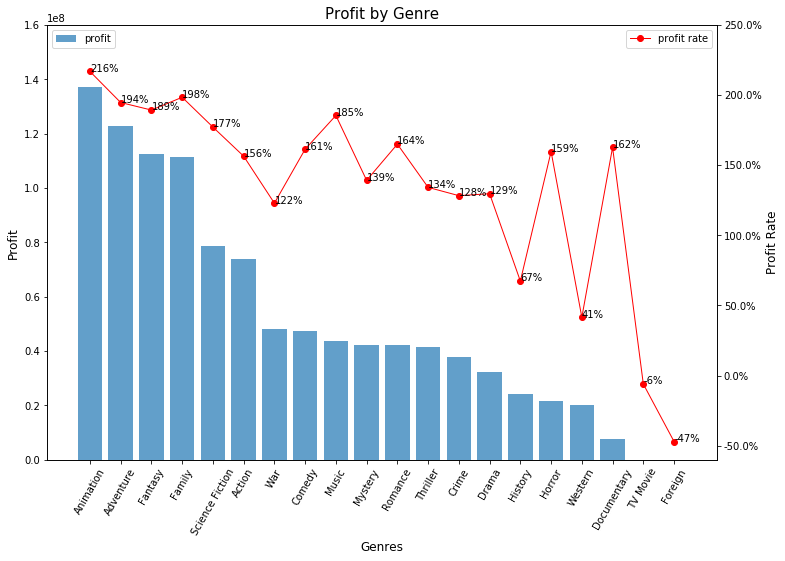

In [634]:
x = list(profit_rate.index)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
plt.bar(x, profit_rate['profit'], label='profit',alpha=0.7)
plt.xticks(rotation = 60, fontsize = 10)
plt.yticks(fontsize = 10)
ax1.set_title('Profit by Genre', fontsize = 15)
ax1.set_ylabel('Profit', fontsize = 12)
ax1.set_xlabel('Genres', fontsize = 12)
ax1.set_ylim(0, 1.6e+8)
ax1.legend(loc = 2)


import matplotlib.ticker as mtick 
ax2 = ax1.twinx()
ax2.plot(x, profit_rate['profit_rate'], 'ro-', lw = 1, color = 'r', label = 'profit rate')
fmt = '%.1f%%'
yticks = mtick.FormatStrFormatter(fmt) 
ax2.yaxis.set_major_formatter(yticks)
ax2.set_ylabel('Profit Rate', fontsize = 12)
ax2.legend(loc = 1)
ax2.set_ylim(-60, 250)
for a, b in zip(x, list(profit_rate.profit_rate)):
    plt.text(a, b, "%d%%" %b)

#### 结论4.2
从收益上来看，Animation, Adventure, Fantasy, Family这四类电影的收益排在所有电影类型的前列。从收益率上来看，Animation，Adventure，Fantasy，Family, Music则是收益率最高的，都在180%以上。TV movie和Foreign都出现了亏损。

#### 4.3. 哪些因素会影响票房 


In [638]:
#看其他因素和revenue的相关性
df[['popularity', 'budget', 'revenue','runtime','vote_count','vote_average', 'vote_average','release_year']].corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,vote_average,release_year
popularity,1.000000,0.480943,0.639110,0.212635,0.791828,0.317698,0.317698,0.147289
budget,0.480943,1.000000,0.699681,0.284998,0.579511,0.103839,0.103839,0.188899
revenue,0.639110,0.699681,1.000000,0.241042,0.770936,0.254395,0.254395,0.095276
runtime,0.212635,0.284998,0.241042,1.000000,0.257260,0.335410,0.335410,-0.065820
vote_count,0.791828,0.579511,0.770936,0.257260,1.000000,0.373362,0.373362,0.166710
vote_average,0.317698,0.103839,0.254395,0.335410,0.373362,1.000000,1.000000,-0.133824
vote_average,0.317698,0.103839,0.254395,0.335410,0.373362,1.000000,1.000000,-0.133824
release_year,0.147289,0.188899,0.095276,-0.065820,0.166710,-0.133824,-0.133824,1.000000


从表中可看出Popularity, budget, vote_count和revenue的相关性较强

In [674]:
df_revenue = df[['popularity', 'budget', 'vote_count','revenue']]

Text(8000, 1700000000.0, 'r=0.77')

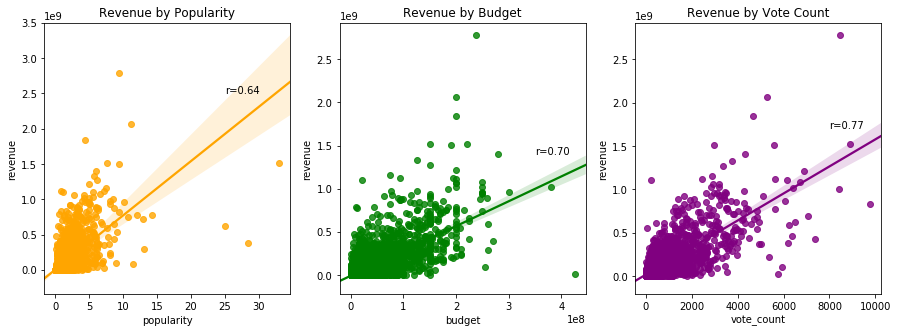

In [681]:
import seaborn as sns
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(1,3,1)
ax1 = sns.regplot(df_revenue.popularity, df_revenue.revenue, color = 'orange')
ax1.set_title('Revenue by Popularity')
ax1.text(25, 2.5e9,'r=0.64',fontsize = 10)


ax2 = plt.subplot(1,3,2)
ax2 = sns.regplot(df_revenue.budget, df_revenue.revenue, color = 'g')
ax2.set_title('Revenue by Budget')
ax2.text(3.5e8, 1.4e9,'r=0.70', fontsize = 10)

ax3 = plt.subplot(1,3,3)
ax3 = sns.regplot(df_revenue.vote_count, df_revenue.revenue, color = 'purple')
ax3.set_title('Revenue by Vote Count')
ax3.text(8000, 1.7e9,'r=0.77', fontsize = 10)

#### 结论4.3
Popularity, Budget, Vote Count和票房Revenue都有较强的正相关性，其中Vote Count相关性最高。